In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
%matplotlib inline
plt.rcParams.update({'font.size': 15})
# plt.style.use('seaborn-dark')

In [2]:
auc = {}
logloss = {}
acc = {}
rec = {}
rmse = {}
prec = {}

def get_data(path):
    for file in os.listdir(path):
        print(file)
        model=file.split('.')[0]
        acc[model] = []
        auc[model] = []
        rmse[model] = []
        logloss[model] = []
        rec[model] = []
        prec[model] = []
        with open(path+'/'+file, 'r') as f:
            for line in f.readlines():
                if 'Epoch' not in line:
                    continue
                line = ''.join([i.strip(' ') for i in line])
                cot = line.split('|')
                acc[model].append(float(cot[1].split(':')[1]))
                rec[model].append(float(cot[2].split(':')[1]))
                prec[model].append(float(cot[3].split(':')[1]))
                rmse[model].append(float(cot[4].split(':')[1]))
                auc[model].append(float(cot[5].split(':')[1]))
                logloss[model].append(float(cot[6].split(':')[1]))

In [3]:
get_data('./data/')

CausalMTA.log
DCRMTA.log
DNAMTA.log


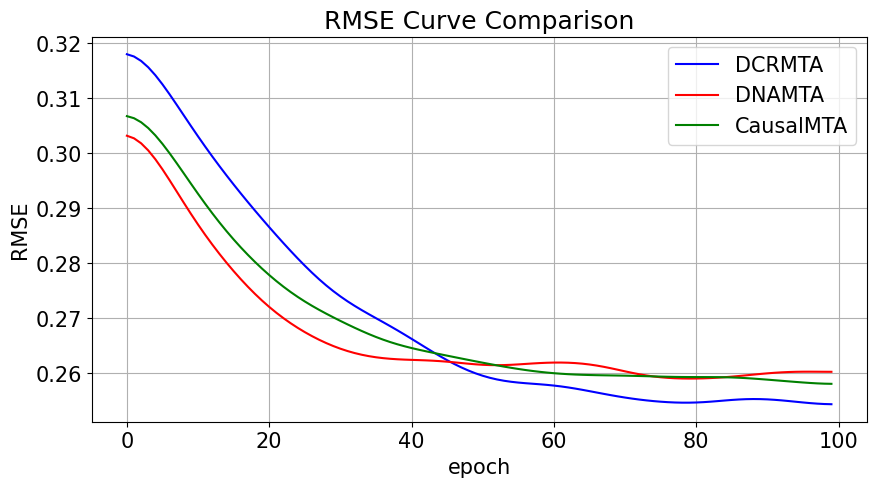

<Figure size 640x480 with 0 Axes>

In [8]:
list(auc.keys())
keys = ['DCRMTA', 'DNAMTA','CausalMTA']
fig = plt.figure(figsize=(10,5), edgecolor='white')
bar = ['blue', 'red', 'green']

plt.title('RMSE Curve Comparison')
plt.xlabel('epoch')
plt.ylabel('RMSE')
for id, i in enumerate(keys):
    y_smoothed = gaussian_filter1d(rmse[i], sigma=5)
    plt.plot(y_smoothed, label=i, color=bar[id])
plt.legend(loc='best')
plt.grid()



plt.savefig('LossComparison.png', dpi=1200)
plt.show()
plt.clf()


In [9]:
get_data('../terminal_info/mock/')

causalMTA_nvar.log
causalMTA_nw.log
DCRMTA.log
DCRMTA_cf025.log
DCRMTA_cf05.log
DCRMTA_noC.log
DCRMTA_noU.log
DNAMTA.log
LR.log
Nlinear.log


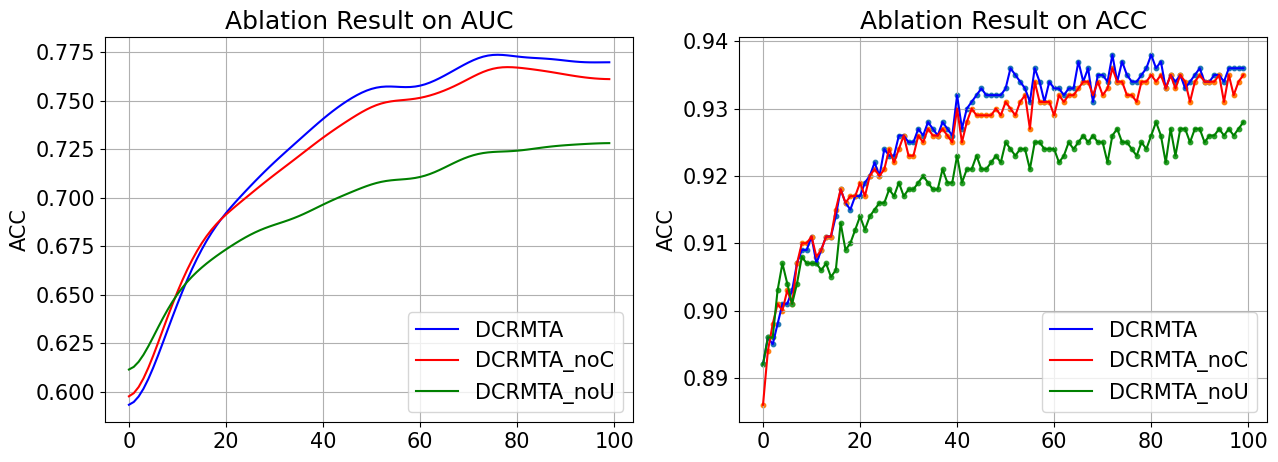

<Figure size 640x480 with 0 Axes>

In [11]:
def process_plt(fig, models):
    ax = fig.add_subplot(1,2,1)
    ax.set_title('Ablation Result on AUC')
    ax.set_ylabel('ACC')
    for i,model_name in enumerate(models):
        # plt.scatter(range(0,100),auc[model_name], s=10)
        y = gaussian_filter1d(auc[model_name], sigma=5)
        ax.plot(y, label=model_name, color=bar[i])
    ax.grid()
    plt.legend(loc='best')

    ax = fig.add_subplot(1,2,2)
    ax.set_title('Ablation Result on ACC')
    ax.set_ylabel('ACC')
    for i,model_name in enumerate(models):
        # y = gaussian_filter1d(acc[model_name], sigma=1)
        plt.scatter(range(0,100),acc[model_name], s=10)
        ax.plot(acc[model_name], label=model_name, color=bar[i])
    ax.grid()
    plt.legend(loc='best')
 

    # 显示画布
fig = plt.figure(figsize=(15,5))


models = ['DCRMTA', 'DCRMTA_noC','DCRMTA_noU']
process_plt(fig, models)

plt.savefig('AblationResult.jpg', dpi=1200)
plt.show()
plt.clf()

['Conversion Number', 'Total Budget']


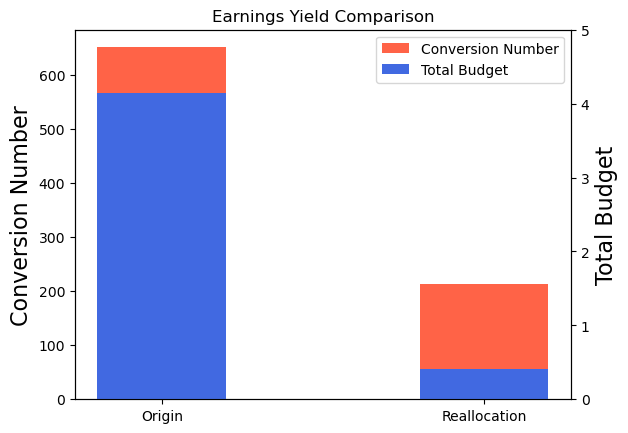

<Figure size 640x480 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

size = 2
Xnames = ['Origin', 'Reallocation']
x = np.arange(size)
a = [651, 214.092857]
b = [4.146, 0.41452]

total_width, n = 0.8, 2
width = total_width / n
x = x - (total_width - width) / 2
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
bar1 = ax1.bar(x, a,  width=width, label='Conversion Number', color = 'tomato')
bar2 = ax2.bar(x, b, width=width, label='Total Budget', color = 'royalblue')
bars = [bar1, bar2]
labels = [h.get_label() for h in bars]
print(labels)



ax1.set_ylabel('Conversion Number',fontdict={'size': 16})  
ax2.set_ylabel('Total Budget',fontdict={'size': 16}) 
plt.xticks(x, Xnames)
plt.legend(bars, labels, loc='upper right')
plt.ylim(0.0, 5.0)
plt.title('Earnings Yield Comparison')
plt.savefig('EYC.jpg', dpi=1200)
plt.show()
plt.clf()

In [98]:
data=[0, 0, 5.46, 3, 5, 7.33, 1, 17, 17.292, 20, 30, 112]

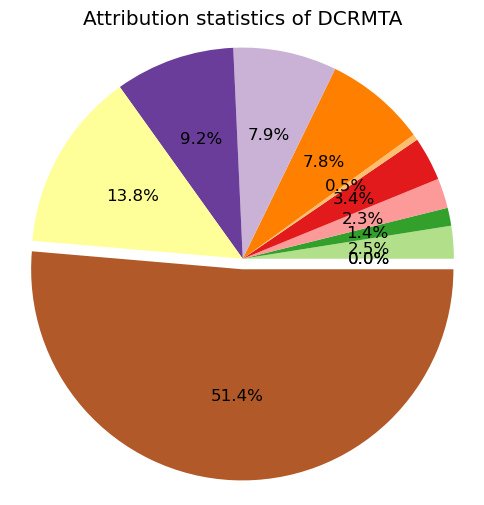

<Figure size 640x480 with 0 Axes>

In [106]:
from matplotlib import font_manager as fm
from  matplotlib import cm

shapes = ['Cross', 'Cone', 'Egg', 'Teardrop', 'Chevron', 'Diamond', 'Cylinder',
       'Rectangle', 'Flash', 'Cigar', 'Changing', 'Formation']


s = pd.Series(data, index=shapes)
labels = s.index
sizes = s.values
explode = (0,0,0,0,0,0,0,0,0,0,0,0.05)  # only "explode" the 1st slice

fig, ax = plt.subplots(figsize=(6,6)) # 设置绘图区域大小

colors = cm.Paired(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%',explode=explode,
        shadow=False, startangle=0, colors=colors)

ax.axis('equal')  
ax.set_title('Attribution statistics of DCRMTA')

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size('large')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.savefig('Attr.jpg', dpi=1200)
plt.show()
plt.clf()